In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
color = sns.color_palette()
%matplotlib inline

In [65]:
with open("combined_data_train.pickle","rb") as f:
    df_combined = pickle.load(f)

with open("combined_data_test.pickle","rb") as f:
    df_combined_test = pickle.load(f)

with open("combined_fb_test.pickle","rb") as f:
    X_test = pickle.load(f)
    
df_train=pd.read_csv("train.csv")
df_store=pd.read_csv("store.csv") 

/anaconda3/envs/udacity_tensorflow_py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_combined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350,NA,NA,1,22,2012,"Mar,Jun,Sept,Dec"
1,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870,NA,NA,0,NA,NA,NA
2,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260,NA,NA,0,NA,NA,NA
3,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880,4,2006,0,NA,NA,NA
4,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900,6,2014,1,31,2013,"Jan,Apr,Jul,Oct"


In [27]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [28]:
df_store.count() #检查缺失值，可见ComptitionDistance, CompetitionOpenSince, Promo2Since都有缺失值

Store                        1115
StoreType                    1115
Assortment                   1115
CompetitionDistance          1112
CompetitionOpenSinceMonth     761
CompetitionOpenSinceYear      761
Promo2                       1115
Promo2SinceWeek               571
Promo2SinceYear               571
PromoInterval                 571
dtype: int64

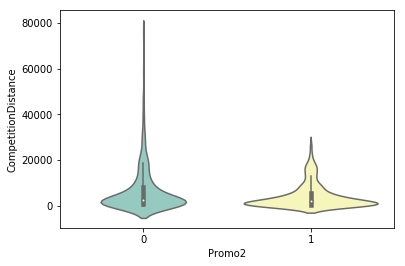

In [83]:
sns.violinplot(y= "CompetitionDistance",x="Promo2", data=df_store,palette="Set3")#开展promotion的分店平均来说离竞争者更近

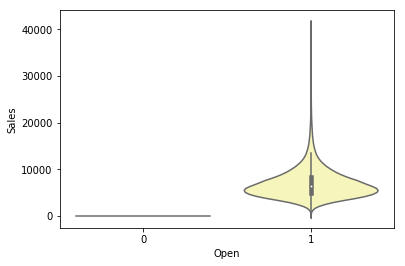

In [79]:
sns.violinplot(x="Open",y="Sales",data=df_train,palette="Set3")#验证了数据正确性，所有不开门的分店当天都没有收入

In [4]:
open_no_sales_index = (df_combined["Sales"]==0)&(df_combined["Open"]!=0)
open_no_sales = df_combined[open_no_sales_index]
open_no_sales.shape
#有54条记录当天分店开门但是却没有收入

(54, 18)

/anaconda3/envs/udacity_tensorflow_py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


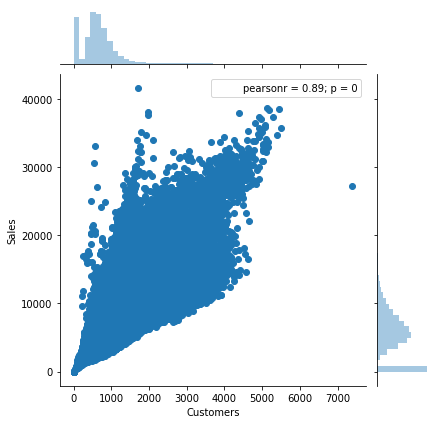

In [82]:
sns.jointplot(x="Customers",y="Sales",data=df_train)

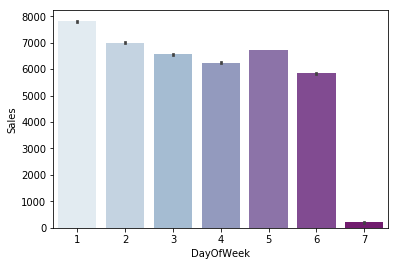

In [87]:
sns.barplot(x="DayOfWeek",y="Sales",data=df_train,palette="BuPu")#周末生病的人周一才能买药，所以周一销售额高

In [213]:
df_train_Y = df_train[:]
df_train_Y.index = pd.to_datetime(df_train_Y["Date"])#原本的index是RangeIndex,即1，2，3...，现在改为用时间做index，才能使用resample
df_train_Y["Year"] = pd.to_datetime(df_train_Y["Date"])
sales_avg_month = df_train_Y["Sales"].resample("M").mean()
print(sales_avg_month)

Date
2013-01-31    5211.555578
2013-02-28    5494.371397
2013-03-31    5820.349168
2013-04-30    5483.749836
2013-05-31    5364.127383
2013-06-30    5402.162960
2013-07-31    6042.062260
2013-08-31    5729.574049
2013-09-30    5322.988430
2013-10-31    5429.258788
2013-11-30    5864.601614
2013-12-31    6703.618140
2014-01-31    5431.875799
2014-02-28    5731.091512
2014-03-31    5584.257312
2014-04-30    5815.993333
2014-05-31    5632.670534
2014-06-30    5681.526188
2014-07-31    5999.403381
2014-08-31    5649.421252
2014-09-30    5865.104029
2014-10-31    5665.564878
2014-11-30    6179.249661
2014-12-31    6973.282456
2015-01-31    5752.747866
2015-02-28    5710.296541
2015-03-31    5949.130132
2015-04-30    5916.857578
2015-05-31    5472.122002
2015-06-30    6199.203976
2015-07-31    6142.705511
Freq: M, Name: Sales, dtype: float64


/anaconda3/envs/udacity_tensorflow_py3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


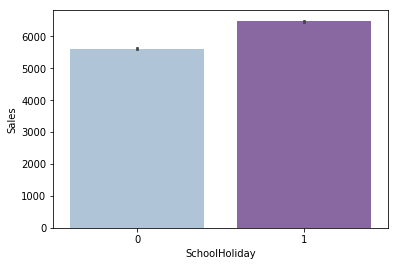

In [214]:
sns.barplot(x="SchoolHoliday",y="Sales",data=df_train,palette="BuPu")#SchoolHoliday的销量较高

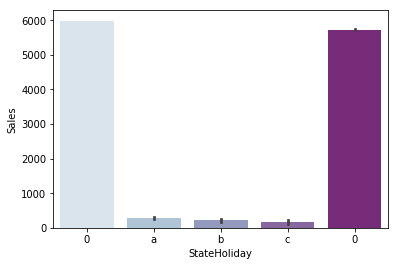

In [24]:
sns.barplot(x="StateHoliday",y="Sales",data=df_train,palette="BuPu")

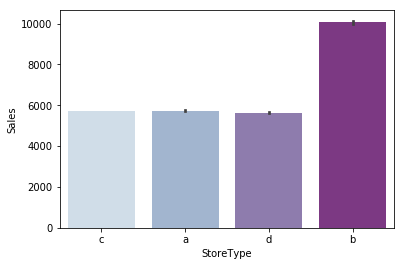

In [18]:
sns.barplot(x="StoreType",y="Sales",data=df_combined,palette="BuPu")

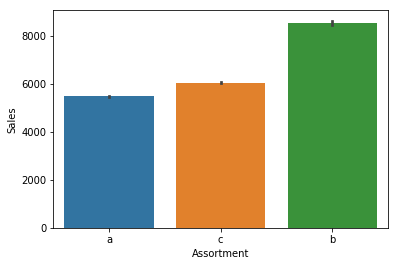

In [21]:
sns.barplot(x="Assortment",y="Sales",data=df_combined)

In [38]:
unique_dates_test = np.unique(df_combined_test["Date"])
dist_test = np.zeros([len(unique_dates_test)])
for i in range(len(unique_dates_test)):
    dist_test[i] = np.sum(df_combined_test["Date"]==unique_dates_test[i])
np.unique(dist_test)
#测试集中只有856家分店

array([856.])

In [37]:
unique_dates = np.unique(df_combined["Date"])
dist = np.zeros([len(unique_dates)])
for i in range(len(unique_dates)):
    dist[i] = np.sum(df_combined["Date"]==unique_dates[i])
print(np.unique(dist))
print("当天只有935家分店信息的天数:",np.sum(dist==935))
print("当天只有1114家分店信息的天数:",np.sum(dist==1114))
print("当天只有1115家分店信息的天数:",np.sum(dist==1115))
#训练集中大多数天数中有所有分店的记录，但是有连续的184天只有935家分店的记录

[ 935. 1114. 1115.]
当天只有935家分店信息的天数: 184
当天只有1114家分店信息的天数: 1
当天只有1115家分店信息的天数: 757


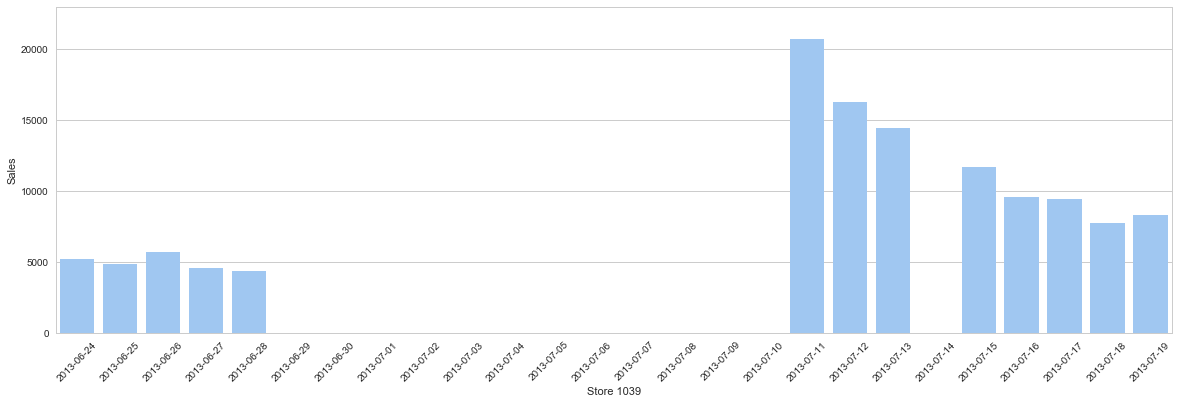

In [61]:
store_sample = df_combined[df_combined["Store"]==1039]
sample = store_sample.iloc[174:200,:]
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(sample["Date"],sample["Sales"],color="b")
ax.set(ylim=(0, 23000), xlabel="Store 1039",
       ylabel="Sales")
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)
#连续关门对开门后一周的销售有影响

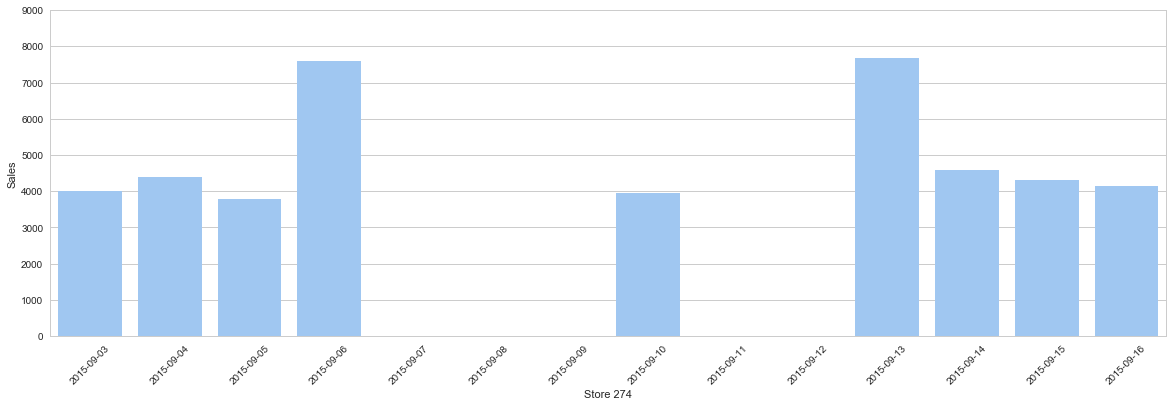

In [66]:
pred = pd.read_csv("predictions_10models.csv")
store = X_test[X_test["Store"]==274]
store_sample = store.iloc[33:47,:]
sales = []
for i in np.array(store_sample["Id"]):
    sales.append(pred.loc[i-1,"Sales"])
sales = np.squeeze(sales).reshape([-1,1])
date = np.array(store_sample["Date"]).reshape([-1,1])
df_sales = pd.DataFrame(np.hstack([date, sales]),columns=["Date","Sales"])
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x="Date",y="Sales",data=df_sales,color="b")
ax.set(ylim=(0, 9000), xlabel="Store 274",
       ylabel="Sales")
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)